ARRESTED DEVELOPMENT RATINGS
WHAT ARE THE BEST AND WORST MOMENTS IN ARRESTED DEVELOPMENT

STEP 1: IMPORT THE DATA

In [24]:
# Reading TSV files using pandas
import pandas as pd
# import os


# Assign file name to a variable
ep_file_path = 'title.episode.tsv.gz' # contains IMDB's full repository of episodes
rate_file_path = 'title.ratings.tsv.gz' # contains IMDB's full repository of ratings
akas_file_path = 'title.akas.tsv.gz' # contains IMDB's full repository of generic show info, including name


# Use .read_csv() with args to unzip the tsv.gz for each file 
ep = pd.read_csv(ep_file_path, sep='\t', compression = 'gzip')
rate = pd.read_csv(rate_file_path, sep='\t', compression = 'gzip')
akas = pd.read_csv(akas_file_path, sep='\t', compression = 'gzip')

# print(os.getcwd()) # Check where the working directory is
# # Run this to check whether file is in the correct directory:
# if os.path.exists(file_path):
#     df = pd.read_csv(file_path, sep='\t', compression='gzip')
# else:
#     print("File does not exist.")

/var/folders/n4/lff0x4bd7h137vxw7zpjzwn00000gq/T/ipykernel_74557/692151625.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv(akas_file_path, sep='\t', compression = 'gzip')


STEP 2: DATA PREP

In [2]:
# Brief look at the structure of the data
display(ep,rate,akas)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
7658160,tt9916846,tt1289683,3,18
7658161,tt9916848,tt1289683,3,17
7658162,tt9916850,tt1289683,3,19
7658163,tt9916852,tt1289683,3,20


,tconst,averageRating,numVotes
0,tt0000001,5.7,1990
1,tt0000002,5.8,265
2,tt0000003,6.5,1854
3,tt0000004,5.5,178
4,tt0000005,6.2,2640
...,...,...,...
1335970,tt9916730,8.3,10
1335971,tt9916766,7.0,22
1335972,tt9916778,7.2,36
1335973,tt9916840,8.8,6


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
36788269,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
36788270,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
36788271,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
36788272,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [25]:
## Here, we cross-reference the above tables to determine which data we need and which we can drop.
## We see in the akas_df the 'titleId' and 'title' columns which contain the name of the show we are searching 
## for as well as the ID, which we can see shares the structure of the 'tconst' and 'parentTconst' columns in
## ep_df and rate_df. Since both ep_df and rate_df lack a 'title' column, we will need the ID to work with each table.

print(akas.columns) # check the columns list of akas_df
# akas = akas.drop(['ordering','region','language','types','attributes','isOriginalTitle'],axis=1) # Drop columns

a_df = akas.loc[akas['title'] == 'Arrested Development'] # Filter for the title we are interested in
display(a_df) # View updated table

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
1808155,tt0367279,10,Arrested Development,AU,\N,imdbDisplay,\N,0
1808158,tt0367279,13,Arrested Development,TH,en,imdbDisplay,\N,0
1808161,tt0367279,16,Arrested Development,PH,en,imdbDisplay,\N,0
1808162,tt0367279,17,Arrested Development,AE,\N,imdbDisplay,\N,0
1808163,tt0367279,18,Arrested Development,TR,tr,imdbDisplay,\N,0
1808164,tt0367279,19,Arrested Development,IN,en,imdbDisplay,\N,0
1808165,tt0367279,1,Arrested Development,SG,en,imdbDisplay,\N,0
1808167,tt0367279,21,Arrested Development,GR,\N,\N,\N,0
1808168,tt0367279,22,Arrested Development,AR,\N,\N,\N,0
1808170,tt0367279,24,Arrested Development,SE,\N,dvd,\N,0


In [27]:
## Filter and sort episode data. In the previous cell, we see that the 'titleId' that we are interested in is 'tt0367279.'
## Given that, we will create a new DataFrame called episodes which we contain the episode data that matches the 
## 'titleId' we found. 

episodes = pd.DataFrame(ep.loc[ep['parentTconst'] == 'tt0367279'])
episodes['episodeNumber'] = episodes['episodeNumber'].astype(int) # String to int conversion for sorting
# for val in episodes['episodeNumber']:
#     if val < 10:
#         episodes['episodeNumber'] = val
episodes['seasonNumber'] = episodes['seasonNumber'].astype(int) # String to int conversion for sorting

episodes.sort_values(by=['seasonNumber','episodeNumber'], ascending=[True,True], inplace=True) # Sorting
pd.set_option('display.max_rows', 100) # Improve the viewing of the data
display(episodes)

## Though in the akas table we see a few different IDs associated with our title, this data is likely 
## outlier data (shares the same name but is not the same show). To confirm, we recall that our show 
## contains 84 episodes. Then we run the code to confirm:
# episodes.shape # Return the size of the DataFrame for verification

,tconst,parentTconst,seasonNumber,episodeNumber
26367,tt0515236,tt0367279,1,1
26387,tt0515256,tt0367279,1,2
26343,tt0515212,tt0367279,1,3
26354,tt0515223,tt0367279,1,4
26345,tt0515214,tt0367279,1,5
26388,tt0515257,tt0367279,1,6
26352,tt0515221,tt0367279,1,7
26362,tt0515231,tt0367279,1,8
26378,tt0515247,tt0367279,1,9
26366,tt0515235,tt0367279,1,10


In [28]:
## Here we will combine the episode data and the rating data to have our full, usable dataset.

eprate = rate.merge(episodes, on='tconst', how='inner') # Create new table with rating + episode data with an inner join
eprate.sort_values(by=['seasonNumber','episodeNumber'], ascending=[True,True], inplace=True) # Sort values by season and episode
display(eprate) 

## Tests: 
# print(rate_df.loc[rate_df['tconst'] == 'tt0515207']) # Rating of s2e6 should be 9.0
# print(rate_df.loc[rate_df['tconst'] == 'tt0515208']) # Rating of s1e16 should be 8.5

,tconst,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
29,tt0515236,8.1,4027,tt0367279,1,1
49,tt0515256,8.4,3546,tt0367279,1,2
5,tt0515212,8.1,3238,tt0367279,1,3
16,tt0515223,8.3,3093,tt0367279,1,4
7,tt0515214,8.2,2955,tt0367279,1,5
50,tt0515257,8.0,2843,tt0367279,1,6
14,tt0515221,8.1,2794,tt0367279,1,7
24,tt0515231,8.0,2726,tt0367279,1,8
40,tt0515247,8.4,2698,tt0367279,1,9
28,tt0515235,9.1,3435,tt0367279,1,10


In [29]:
data = pd.DataFrame(eprate.iloc[:,[1,2,4,5]])
# data

In [30]:
## Here we create a combined column which appends the seasonNumber 
## and episodeNumber of every episode for plotting purposes

for idx in data.index:
    if int(data.at[idx, 'episodeNumber']) < 10:
        data.at[idx, 'episodeNumber'] = "0" + str(data.at[idx, 'episodeNumber'])

data['combined'] = data['seasonNumber'].astype(str) + data['episodeNumber'].astype(str)
# display(data)

STEP 3: DATA ANALYSIS & VISUALIZATION

In [31]:
## Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
print(data.describe()) # Descriptive statistics 

       averageRating     numVotes  seasonNumber
count      84.000000    84.000000     84.000000
mean        8.061905  2065.940476      2.821429
std         0.646381   736.040602      1.482108
min         6.600000   733.000000      1.000000
25%         7.600000  1499.750000      1.000000
50%         8.200000  2228.000000      3.000000
75%         8.525000  2530.750000      4.000000
max         9.200000  4027.000000      5.000000


In [33]:
season_ep_count={'S1 Episode Count':0, 'S2 Episode Count':0, 'S3 Episode Count':0, 'S4 Episode Count':0, 'S5 Episode Count':0}
for entry in data['seasonNumber']:
    if entry == 1:
        season_ep_count['S1 Episode Count'] +=1
    elif entry == 2:
        season_ep_count['S2 Episode Count'] +=1
    elif entry == 3:
        season_ep_count['S3 Episode Count'] +=1
    elif entry == 4:
        season_ep_count['S4 Episode Count'] +=1
    else:
        season_ep_count['S5 Episode Count'] +=1
season_ep_count

{'S1 Episode Count': 22,
 'S2 Episode Count': 18,
 'S3 Episode Count': 13,
 'S4 Episode Count': 15,
 'S5 Episode Count': 16}

In [34]:
## Divide the dataset into the 5 seasons
s1_data = data.iloc[0:22]
s2_data = data.iloc[22:40]
s3_data = data.iloc[40:53]
s4_data = data.iloc[53:68]
s5_data = data.iloc[68:84]
display(s1_data,s2_data,s3_data,s4_data,s5_data)

,averageRating,numVotes,seasonNumber,episodeNumber,combined
29,8.1,4027,1,01,101
49,8.4,3546,1,02,102
5,8.1,3238,1,03,103
16,8.3,3093,1,04,104
7,8.2,2955,1,05,105
50,8.0,2843,1,06,106
14,8.1,2794,1,07,107
24,8.0,2726,1,08,108
40,8.4,2698,1,09,109
28,9.1,3435,1,10,110


,averageRating,numVotes,seasonNumber,episodeNumber,combined
46,8.7,2495,2,01,201
47,8.5,2443,2,02,202
2,8.8,2604,2,03,203
12,9.0,2759,2,04,204
36,8.5,2318,2,05,205
0,9.0,2850,2,06,206
41,8.1,2225,2,07,207
32,8.0,2186,2,08,208
6,8.0,2200,2,09,209
33,8.3,2333,2,10,210


,averageRating,numVotes,seasonNumber,episodeNumber,combined
43,8.6,2236,3,01,301
42,8.3,2209,3,02,302
11,8.6,2231,3,03,303
26,8.2,2188,3,04,304
23,8.7,2378,3,05,305
45,8.6,2225,3,06,306
30,7.9,2056,3,07,307
18,8.7,2281,3,08,308
35,8.7,2338,3,09,309
9,8.5,2110,3,10,310


,averageRating,numVotes,seasonNumber,episodeNumber,combined
53,7.3,2325,4,01,401
55,6.8,1916,4,02,402
56,6.9,1805,4,03,403
57,7.6,1694,4,04,404
58,7.6,1691,4,05,405
59,7.1,1550,4,06,406
60,8.2,1743,4,07,407
61,7.5,1506,4,08,408
62,7.6,1481,4,09,409
54,7.6,1474,4,10,410


,averageRating,numVotes,seasonNumber,episodeNumber,combined
68,7.0,1222,5,01,501
70,7.1,1076,5,02,502
71,7.3,1029,5,03,503
72,7.3,997,5,04,504
73,7.2,978,5,05,505
74,7.5,978,5,06,506
75,7.4,963,5,07,507
76,7.3,965,5,08,508
77,6.9,818,5,09,509
78,6.9,770,5,10,510


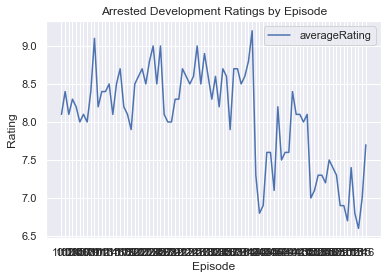

In [35]:
## First iteration plot: general shape of the data
plt.plot(data['combined'],data['averageRating'], label='averageRating')
plt.xlabel('Episode')
plt.ylabel('Rating')
plt.title('Arrested Development Ratings by Episode')
# plt.grid(True)
plt.legend()
plt.savefig('A_D_Performance_Beginning.png')

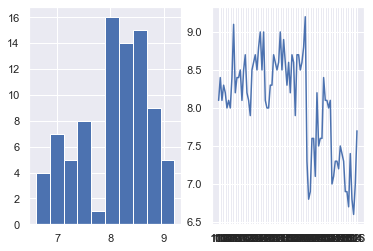

In [36]:
## Second iteration plots: testing different plot types
fig, axes = plt.subplots(1,2)
axes[0].hist(data['averageRating'])
# axes[1].scatter(data['combined'], data['averageRating'])
axes[1].plot(data['combined'], data['averageRating'])
fig.savefig('A_D_Performance_Hist_andLine.png')

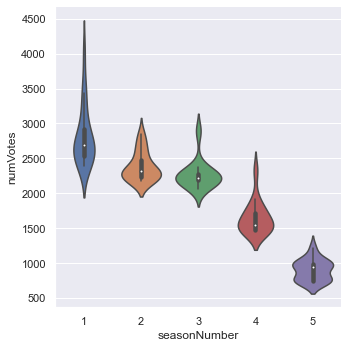

In [37]:
sns.catplot(x='seasonNumber', y='numVotes', kind='violin', data=data) 

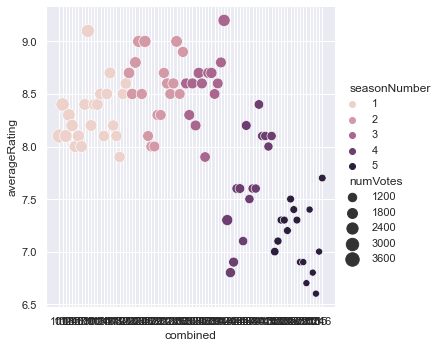

In [38]:
## Third iteration plot: scatterplot view of data, colored by season
sns.set() # 
sns.relplot(x='combined', y='averageRating', size='numVotes', sizes=(50,200), hue='seasonNumber', data=data) 
plt.savefig('A_D_Performance_Scatter.png')
# Alternate view:
# sns.relplot(x='combined', y='averageRating', hue='numVotes', col='seasonNumber', data=data) # Full view scatterplot 
# For above code, include col='seasonNumber' if want to display all 5 seasons side by side. Q: Do the attributes
# between these resulting plots have to be shared or can we adjust things like color?

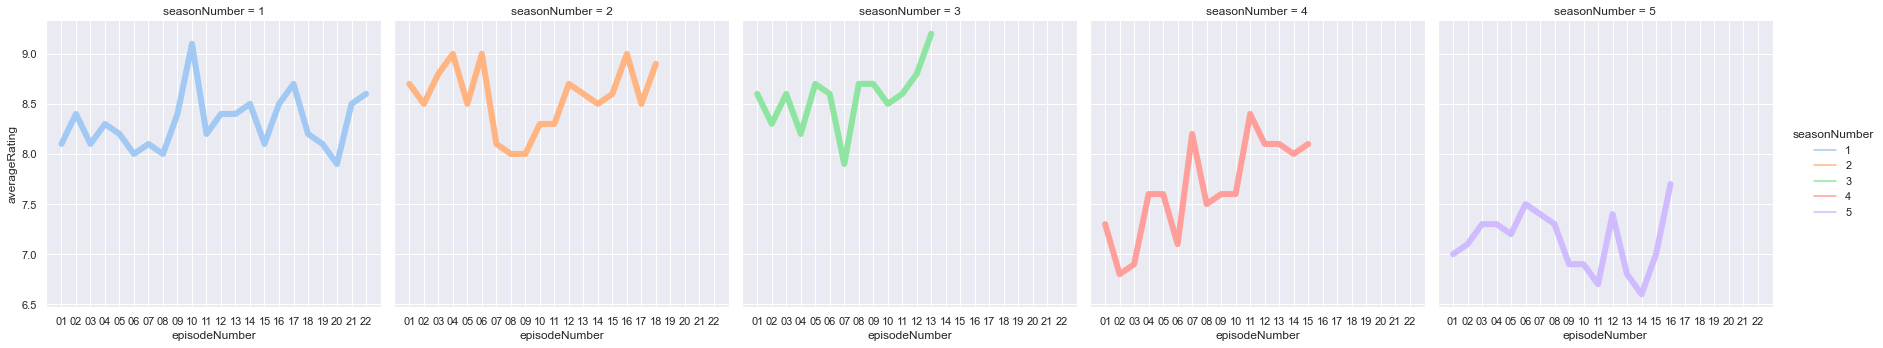

In [40]:
## 4th iteration plot: line graph view of data, divided by season
data['episodeNumber'] = data['episodeNumber'].astype(str)
sns.relplot(
    data=data, x="episodeNumber", y="averageRating", col="seasonNumber",
    hue="seasonNumber",palette='pastel', kind="line", linewidth=6
)
plt.savefig('A_D_Performance_Line_Div.png')

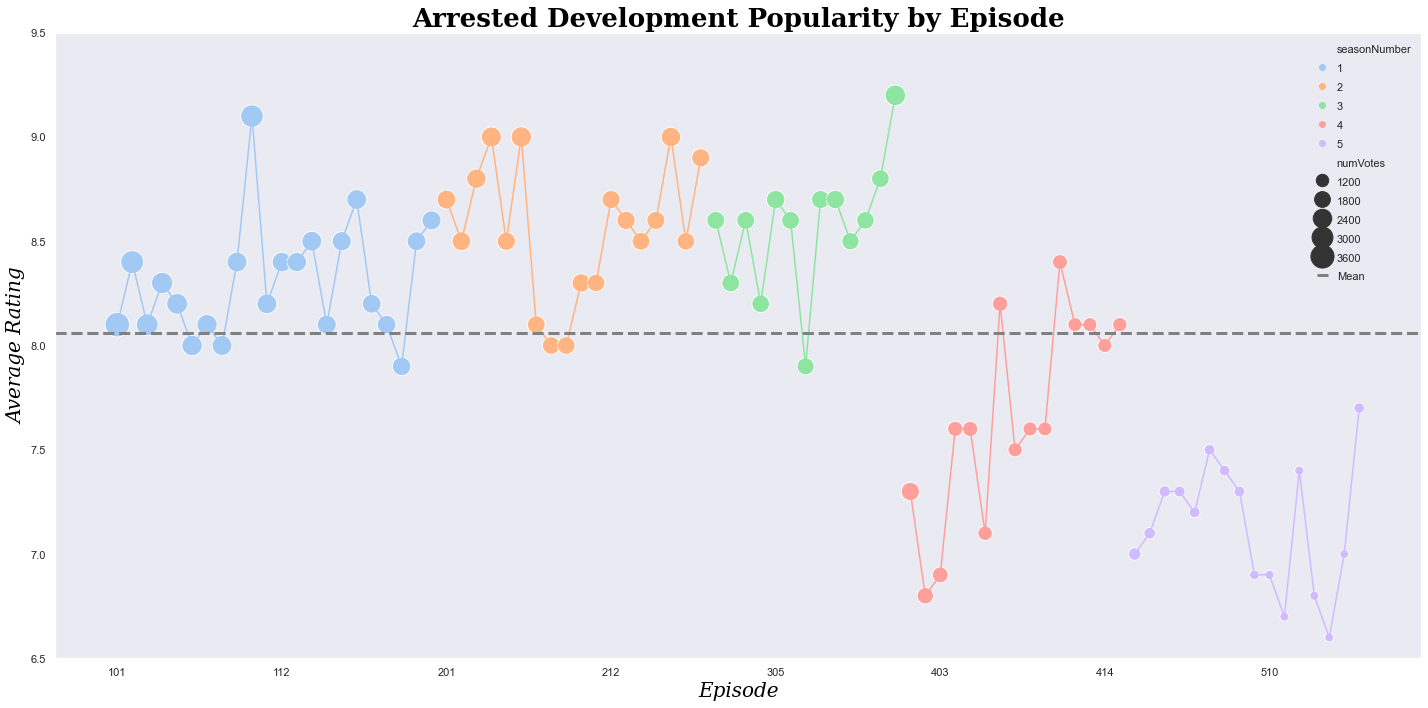

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='combined', y='averageRating', hue='seasonNumber',palette='pastel', size='numVotes', sizes=(80,600), legend=True)
sns.lineplot(data=data, x='combined', y='averageRating', estimator='max', hue='seasonNumber',palette='pastel', legend=False)
plt.axhline(data['averageRating'].mean(), color='gray', linestyle='--', linewidth=3, label='Mean')
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 26,
        }
plt.title("Arrested Development Popularity by Episode", fontdict=font)
font['size']=20 # Update the font size
font['weight'] = 0 # Update =the font weight
plt.ylabel("Average Rating", fontdict=font, style='italic'), plt.xlabel("Episode",fontdict=font,style='italic')
plt.ylim(6.5,9.5)
plt.xticks(data['combined'][::11])
plt.grid(False)
plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False, handlelength=1.0, handleheight=1.5)
plt.tight_layout()
plt.savefig('A_D_Popularity.png')

In [42]:
## Grand mean and standard deviation
data_mean = data['averageRating'].mean()
data_std = data['averageRating'].std()

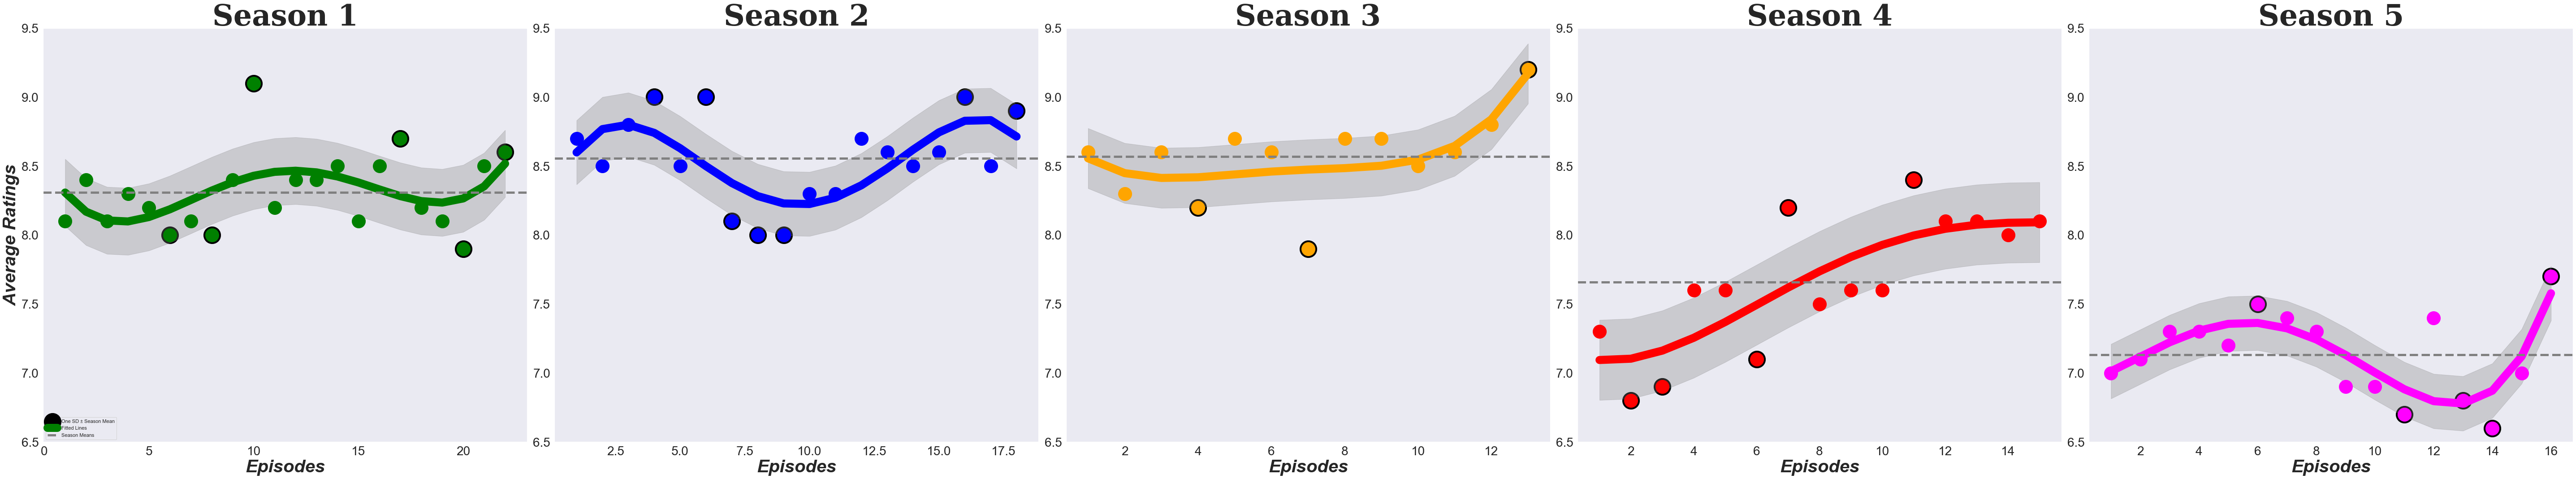

In [43]:
## In this section, we plot each season's average ratings, fit a 4th-degree polynomial to the data, 
## plot the rolling mean by season, and mark the data points which fall outside of one standard 
## deviation from the season's mean.

season_data = [s1_data, s2_data, s3_data, s4_data, s5_data]
fig, axs = plt.subplots(ncols=5,figsize=(80, 15))
color_arr = {
    0:'green',
    1:'blue',
    2:'orange',
    3:'red',
    4:'magenta'
}

axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
for i, s_data in enumerate(season_data):
    xs = s_data['episodeNumber'].astype(int)
    ys = s_data['averageRating']
    
    coeff = np.polyfit(xs,ys,deg=4)
    fit = np.polyval(coeff,xs)
    residuals = ys - fit
    std = np.std(residuals)
    
    s_data_mean = s_data['averageRating'].mean()
    s_data_std = s_data['averageRating'].std()
    below_mean = ys < (s_data_mean-s_data_std)
    below_mean_xs = xs[below_mean]
    below_mean_ys = ys[below_mean]
    axs[i].scatter(below_mean_xs, below_mean_ys, color='black', marker='o', s=1450)
    
    above_mean = ys > (s_data_mean+s_data_std)
    above_mean_xs = xs[above_mean]
    above_mean_ys = ys[above_mean]
    axs[i].scatter(above_mean_xs, above_mean_ys, color='black', marker='o', s=1450, label='One SD ± Season Mean')
    

    axs[i].set_title(f'Season {i+1}', fontsize=65, weight='bold',family='serif')
    axs[i].set_titlesize = 30
    axs[i].set_ylim(6.5,9.5)    
    axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=40)
    axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=40)
    axs[i].tick_params(axis='both', which='major', labelsize=28)
    axs[i].grid(False)
    axs[i].plot(xs, ys, 'o', color=color_arr[i], markersize=30) # size='numVotes'
    axs[i].plot(xs, fit, color=color_arr[i], label='Fitted Lines', linewidth=18)
    axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
    axs[i].axhline(s_data['averageRating'].mean(), color='gray', linestyle='--', linewidth=5, label='Season Means')
    axs[0].legend(loc='lower left')

fig.tight_layout()    
# plt.savefig('A_D_Performance_Season_Mean.png')

From the above plots, we see some outlier data in both positive and negative directions (from the account of someone seeking the highest ratings). Seasons 1 and 2 were a bit oscillatory, with just a few standout best and worst moments. Season 3 begins as strongly as season 2 ended, and we see some steady growth until the end, where on the season 3 finale the show achieves its highest rating across the board. 

Additionally, see a large delta in the performances of seasons 1-3 versus the performances of seasons 4-5. Noticeably, the mean line by each season is relatively stable until we reach season 4, where it drops considerably, then again in season 5. One explanation for this drop could be that the show was canceled in its third season, before it achieved its critical acclaim and cultish fame that would later ignite its renewal. Some seven-ish years after the end of the third season began the continuation of the show, with many of the original cast reprising their roles. A gap as long as this has the power to disrupt the viewer's immersion in a show. Because season 3 was slated to be their final season, the show very clearly reaches a satisfying conclusion. To then pick the show back up years later makes for a less fluid transition between seasons, as for example, the experience of seeing some of the characters aged and in vastly different areas of their lives. 

Evident in the data, season 4 starts slow but reaches a modest performance level, featuring the most linear trend across all of the seasons. While Arrested Development is clearly at its peak in seasons 1-3, based on this data, season 4 is worth considering. Season 5, we’ll get to.

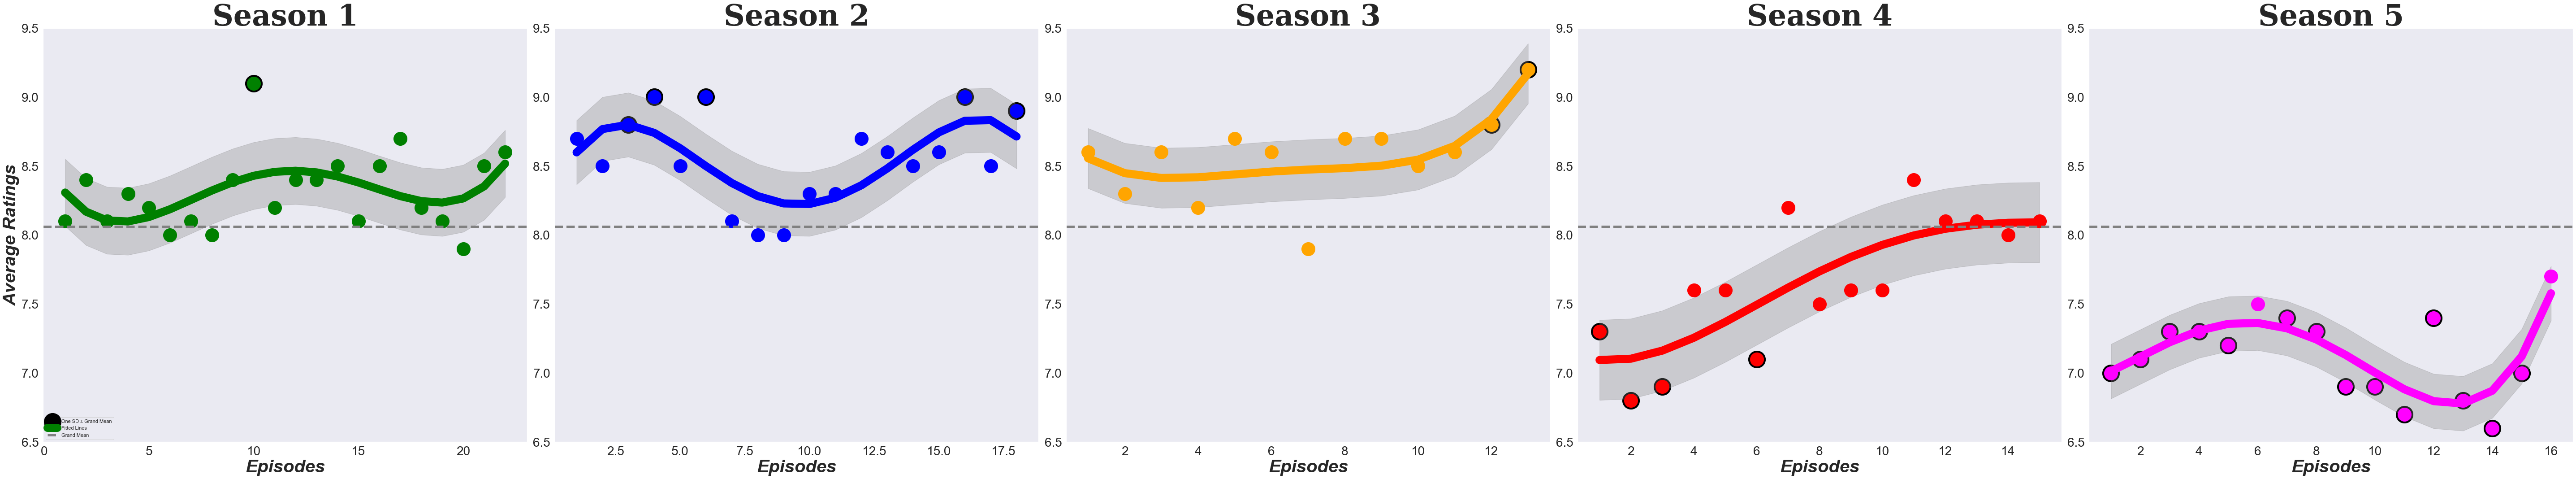

In [44]:
## Finally, we end by plotting each season's average ratings alongside the grand mean, fit a 4th-degree 
## polynomial to the data, and, once again, mark data the points which fall outside of one 
## deviation from the grand mean.

season_data = [s1_data, s2_data, s3_data, s4_data, s5_data]
fig, axs = plt.subplots(ncols=5, figsize=(80,15))
color_arr = {
    0:'green',
    1:'blue',
    2:'orange',
    3:'red',
    4:'magenta'
}

axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
for i, s_data in enumerate(season_data):
    xs = s_data['episodeNumber'].astype(int)
    ys = s_data['averageRating']
    
    coeff = np.polyfit(xs,ys,deg=4)
    fit = np.polyval(coeff,xs)
    residuals = ys - fit
    std = np.std(residuals)
    
    data_mean = data['averageRating'].mean()
    data_std = data['averageRating'].std()
    below_mean = ys < (data_mean-data_std)
    below_mean_xs = xs[below_mean]
    below_mean_ys = ys[below_mean]
    axs[i].scatter(below_mean_xs, below_mean_ys, color='black', marker='o', s=1450)
    
    above_mean = ys > (data_mean+data_std)
    above_mean_xs = xs[above_mean]
    above_mean_ys = ys[above_mean]
    axs[i].scatter(above_mean_xs, above_mean_ys, color='black', marker='o', s=1450, label='One SD ± Grand Mean')
    

    axs[i].set_title(f'Season {i+1}', fontsize=65, weight='bold',family='serif')
    axs[i].set_titlesize = 30
    axs[i].set_ylim(6.5,9.5)    
    axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=40)
    axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=40)
    axs[i].tick_params(axis='both', which='major', labelsize=28)
    axs[i].grid(False)
    axs[i].plot(xs, ys, 'o', color=color_arr[i], markersize=30) # size='numVotes'
    axs[i].plot(xs, fit, color=color_arr[i], label='Fitted Lines', linewidth=18)
    axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
    axs[i].axhline(data['averageRating'].mean(), color='gray', linestyle='--', linewidth=5, label='Grand Mean')
    axs[0].legend(loc='lower left')
    
fig.tight_layout()    
# plt.savefig('A_D_Performance_Grand_Mean.png')

Now we see a grand mean line plotted against the same data as before. Our highlighted points now vary from the previous graphs as we look for the data that lie outside of 1 standard deviation from the grand mean. Immediately, we see that the only points outside this range are the highest rated episodes of the show, those contained in seasons 1-3. Season 4’s slow start consists of the first batch of low-rated episodes of the show, but holistically, season 4 greatly outperforms season 5. By proportion of episodes below one standard deviation of the mean, we see ~26.67% (4/15) of season 4 episodes occupying this space, in comparison to the 87.50% (14/16) of season 5 episodes that meet the same criteria. Empirically, season 5 is not worth anyone’s time save maybe the completionist. Perhaps it is up for debate whether season 4 is worthy of sharing the spotlight with seasons 1-3. Undoubtedly, seasons 1-3 and seasons 4-5 feel like different shows and so it is up to the viewer if they wish to subject themselves to what is made of this prolific show. Season 3 ends nicely, as we’ve proved, and it is within that vein that we could simply pretend nothing comes after that. Ignorance is bliss as they say.

In [62]:
# ## Resizing final plots and resaving
# season_data = [s1_data, s2_data, s3_data, s4_data, s5_data]
# fig, axs = plt.subplots(ncols=5, figsize=(50,15))
# color_arr = {
#     0:'green',
#     1:'blue',
#     2:'orange',
#     3:'red',
#     4:'magenta'
# }

# axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
# for i, s_data in enumerate(season_data):
#     xs = s_data['episodeNumber'].astype(int)
#     ys = s_data['averageRating']
    
#     coeff = np.polyfit(xs,ys,deg=4)
#     fit = np.polyval(coeff,xs)
#     residuals = ys - fit
#     std = np.std(residuals)
    
#     data_mean = data['averageRating'].mean()
#     data_std = data['averageRating'].std()
#     below_mean = ys < (data_mean-data_std)
#     below_mean_xs = xs[below_mean]
#     below_mean_ys = ys[below_mean]
#     axs[i].scatter(below_mean_xs, below_mean_ys, color='black', marker='o', s=1450)
    
#     above_mean = ys > (data_mean+data_std)
#     above_mean_xs = xs[above_mean]
#     above_mean_ys = ys[above_mean]
#     axs[i].scatter(above_mean_xs, above_mean_ys, color='black', marker='o', s=1450, label='One SD ± Grand Mean')
    

#     axs[i].set_title(f'Season {i+1}', fontsize=65, weight='bold',family='serif')
#     axs[i].set_titlesize = 30
#     axs[i].set_ylim(6.5,9.5)    
#     axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=40)
#     axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=40)
#     axs[i].tick_params(axis='both', which='major', labelsize=28)
#     axs[i].grid(False)
#     axs[i].plot(xs, ys, 'o', color=color_arr[i], markersize=30) # size='numVotes'
#     axs[i].plot(xs, fit, color=color_arr[i], label='Fitted Lines', linewidth=18)
#     axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
#     axs[i].axhline(data['averageRating'].mean(), color='gray', linestyle='--', linewidth=5, label='Grand Mean')
#     axs[0].legend(loc='lower left')
    
# fig.tight_layout() 
# plt.savefig('test.png')